In [1]:
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

#setups
%matplotlib inline
sns.set()
#this will let you see all the columns that are in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [2]:
columns_to_keep = ['TUCASEID','PEEDUCA','TEAGE','TELFS','TESEX','TESPEMPNOT','TRCHILDNUM','TRDPFTPT','TRERNWA','TUFNWGTP','TUYEAR']
summ_demo_iter = pd.read_csv('../atussum_0321.csv', iterator= True, chunksize=10000, usecols=columns_to_keep)
# summ_demo_iter = pd.read_csv('./atussum_1121-reduced.csv', iterator= True, chunksize=10000, usecols=columns_to_keep)
summ_list = []
for chunk in summ_demo_iter:
    summ_temp = chunk[(chunk.TUYEAR <= 2020)]
    summ_temp = summ_temp.rename(columns={'TUCASEID':'case_id',
                                          'PEEDUCA':'education',
                                          'TEAGE':'age',
                                          'TELFS':'employed',
                                          'TESEX':'gender',
                                          'TESPEMPNOT':'spouse_empl',
                                          'TRCHILDNUM':'num_child',
                                          'TRDPFTPT':'full_part_wrk',
                                          'TRERNWA':'weekly_earn',
                                          'TUFNWGTP':'weights',
                                          'TUYEAR':'year'})
    summ_list.append(summ_temp)
summ_demo_final = pd.concat(summ_list)
summ_demo_final.shape
# salary_education_info = salary_education_info.drop(salary_education_info[(salary_education_info.weekly_earn == -1)].index)
# salary_education_info = salary_education_info.drop(salary_education_info[(salary_education_info.weekly_earn <100)].index)

(219368, 11)

In [9]:
columns_2 = ['TUCASEID','TULINENO','HUFAMINC','HEFAMINC','HRYEAR4']
cps_iter = pd.read_csv('./atuscps_0320.dat', iterator= True, chunksize=20000, usecols=columns_2)
cps_list = []

#iterator
for chunk in cps_iter:
    cps_temp = chunk[(chunk.TULINENO == 1) & (chunk.HRYEAR4 <= 2020)]
    cps_temp = cps_temp.rename(columns={'TUCASEID':'case_id','HUFAMINC':'faminc_1','HEFAMINC':'faminc_2','HRYEAR4':'year'})
    cps_list.append(cps_temp)

cps_final = pd.concat(cps_list)
cps_final.reset_index(drop=True, inplace=True)
cps_final.shape


(462185, 5)

In [12]:
summ_num_ind = summ_demo_final['case_id']
cps_num_ind = cps_final['case_id']
merge = pd.merge(summ_num_ind,cps_num_ind, left_on=['case_id'], right_on=['case_id'], how='inner', suffixes=('_sum', '_cps')).reset_index(drop=True).copy(deep=True)
sum_no_inc = summ_demo_final[(summ_demo_final.weekly_earn == -1)]
both = cps_final[(cps_final.faminc_1 == -1) & (cps_final.faminc_2 == -1)]
test_col = []
for i in range(len(cps_final)):
    if cps_final.faminc_1[i] == -1 and cps_final.faminc_2[i] == -1:
        test_col.append(0)
    elif cps_final.faminc_1[i] > -1:
        test_col.append(cps_final.faminc_1[i])
    elif cps_final.faminc_2[i] > -1:
        test_col.append(cps_final.faminc_2[i])
    else:
        test_col.append(0)

In [22]:
ones = [i for i in test_col if i == 0]
cps_final['income'] = test_col
cps_sub = cps_final[cps_final.income != 0]
cps_income = cps_sub[['case_id', 'income']]
summ_num_ind_2 = summ_demo_final['case_id']
cps_num_ind_2 = cps_sub['case_id']
merge_2 = pd.merge(summ_num_ind_2,cps_income, left_on=['case_id'], right_on=['case_id'], how='inner', suffixes=('_sum', '_cps')).reset_index(drop=True).copy(deep=True)
all_demo_income = pd.merge(summ_demo_final,cps_income, left_on=['case_id'], right_on=['case_id'], how='inner', suffixes=('_sum', '_cps')).reset_index(drop=True).copy(deep=True)
all_demo_income.education.replace(to_replace=[31,32,33,34,35,36,37], value=38, inplace=True)
all_demo_income.education.replace(to_replace=[42], value=41, inplace=True)
salary_education_info = all_demo_income

In [23]:
salary_education_info.head(10)

,case_id,education,age,employed,gender,spouse_empl,num_child,full_part_wrk,weekly_earn,weights,year,educaton_text,income
0,20030100013280,44,60,2,1,2,0,2,66000,8.155463e+06,2003,Masters,13
1,20030100013352,41,26,2,2,2,0,2,20000,3.830527e+06,2003,Associates Degree,14
2,20030100013848,39,36,4,2,1,2,-1,-1,6.622023e+06,2003,High School or GED,7
3,20030100014165,45,51,1,1,2,2,1,-1,3.068387e+06,2003,Professional_Deg,14
4,20030100014169,43,32,2,2,1,1,1,57600,3.455425e+06,2003,Bachelors,11
5,20030100014209,39,44,1,2,1,1,1,-1,1.637826e+06,2003,High School or GED,5
6,20030100014427,40,21,1,2,-1,1,1,33250,6.574427e+06,2003,Some College,14
7,20030100014550,41,33,1,2,1,3,1,63000,1.528296e+06,2003,Associates Degree,12
8,20030100014758,41,39,1,2,2,4,1,45000,4.277053e+06,2003,Associates Degree,8
9,20030100014928,40,26,1,1,1,1,1,65000,1.961482e+06,2003,Some College,9


In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
salary_education_info.groupby(['education']).describe()

case_id                                                          \
             count          mean           std           min           25%   
education                                                                    
38         30328.0  2.010206e+13  5.015056e+10  2.003010e+13  2.006030e+13   
39         52114.0  2.010737e+13  5.149038e+10  2.003010e+13  2.006081e+13   
40         36075.0  2.010833e+13  5.150893e+10  2.003010e+13  2.006091e+13   
41         19379.0  2.011298e+13  5.182615e+10  2.003010e+13  2.007030e+13   
43         42025.0  2.011400e+13  5.223285e+10  2.003010e+13  2.007040e+13   
44         18802.0  2.011803e+13  5.237057e+10  2.003010e+13  2.007101e+13   
45          3255.0  2.011081e+13  5.177331e+10  2.003010e+13  2.006121e+13   
46          3692.0  2.012008e+13  5.254401e+10  2.003010e+13  2.008030e+13   

                                                         age             \
                    50%           75%           max    count       mean   
education                                                                 
38         2.010050e+13  2.014081e+13  2.020121e+13  30328.0  41.621076   
39         2.011011e+13  2.015040e+13  2.020121e+13  52114.0  50.825824   
40         2.011020e+13  2.015061e+13  2.020121e+13  36075.0  47.031407   
41         2.011101e+13  2.016011e+13  2.020121e+13  19379.0  47.769235   
43         2.011111e+13  2.016040e+13  2.020121e+13  42025.0  46.413421   
44         2.012071e+13  2.016091e+13  2.020121e+13  18802.0  49.412297   
45         2.011051e+13  2.015111e+13  2.020121e+13   3255.0  49.694316   
46         2.012101e+13  2.016121e+13  2.020121e+13   3692.0  51.563922   

                                                   employed            \
                 std   min   25%   50%   75%   max    count      mean   
education                                                               
38         23.223365  15.0  17.0  38.0  63.0  85.0  30328.0  3.442825   
39         17.708180  15.0  37.0  51.0  65.0  85.0  52114.0  2.716852   
40         17.653655  15.0  32.0  46.0  61.0  85.0  36075.0  2.446237   
41         15.170269  15.0  36.0  46.0  59.0  85.0  19379.0  2.179834   
43         14.945169  15.0  35.0  44.0  57.0  85.0  42025.0  2.011612   
44         14.606627  18.0  37.0  47.0  60.0  85.0  18802.0  2.024838   
45         14.562614  20.0  38.0  47.0  60.0  85.0   3255.0  1.749002   
46         14.533660  16.0  40.0  50.0  63.0  85.0   3692.0  1.801192   

                                               gender                      \
                std  min  25%  50%  75%  max    count      mean       std   
education                                                                   
38         1.867039  1.0  1.0  5.0  5.0  5.0  30328.0  1.536369  0.498684   
39         1.924016  1.0  1.0  1.0  5.0  5.0  52114.0  1.560560  0.496324   
40         1.860945  1.0  1.0  1.0  5.0  5.0  36075.0  1.571920  0.494807   
41         1.768351  1.0  1.0  1.0  5.0  5.0  19379.0  1.599412  0.490030   
43         1.686092  1.0  1.0  1.0  3.0  5.0  42025.0  1.552647  0.497226   
44         1.685239  1.0  1.0  1.0  3.0  5.0  18802.0  1.583183  0.493045   
45         1.518776  1.0  1.0  1.0  1.0  5.0   3255.0  1.418126  0.493327   
46         1.551262  1.0  1.0  1.0  1.0  5.0   3692.0  1.411430  0.492160   

                                   spouse_empl                                \
           min  25%  50%  75%  max       count      mean       std  min  25%   
education                                                                      
38         1.0  1.0  2.0  2.0  2.0     30328.0 -0.216895  1.191346 -1.0 -1.0   
39         1.0  1.0  2.0  2.0  2.0     52114.0  0.235983  1.236520 -1.0 -1.0   
40         1.0  1.0  2.0  2.0  2.0     36075.0  0.123825  1.194551 -1.0 -1.0   
41         1.0  1.0  2.0  2.0  2.0     19379.0  0.307653  1.170336 -1.0 -1.0   
43         1.0  1.0  2.0  2.0  2.0     42025.0  0.437692  1.132363 -1.0 -1.0   
44         1.0  1.0  2.0  2.0  2.0

In [70]:
income_dict = {'1': 'Less than $5,000',
 '2': '$5,000 to $7,499',
 '3': '$7,500 to $9,999',
 '4': '$10,000 to $12,499',
 '5': '$12,500 to $14,999',
 '6': '$15,000 to $19,999',
 '7': '$20,000 to $24,999',
 '8': '$25,000 to $29,999',
 '9': '$30,000 to $34,999',
 '10': ' $35,000 to $39,999',
 '11': ' $40,000 to $49,999',
 '12': ' $50,000 to $59,999',
 '13': ' $60,000 to $74,999',
 '14': ' $75,000 to $99,999',
 '15': ' $100,000 to $149,999 (See note)',
 '16': ' $150,000 and over (See note)'}

In [71]:
edu_dict = {'38':'Less than High School', '39':'High School or GED', '40':'Some College', '41': 'Associates Degree', '43':'Bachelors','44':'Masters', '45':'Professional_Deg', '46':'Doctoral'}
# income_dict = {'1':'$0-$9,999', '2':'$10,000 - $19,999', '3':'$20,000 - $29,000', '4':'$30,000 - $39,999', '5':'$40,000 - $49,999', '6':'$50,000 - $59,999', '7':'$60,000 - $74,999', '8':'$75,000 - $99,999', '9': '$100,000 - $149,999', '10':'$150000 and over'}
# eth_dict = {'1' : 'Hispanic', '2': 'White', '3':'Native American', '4':'Black', '5':'Asian', '6':'Other'}
gender_dict = {'1':'Male','2':'Female'}
spouse_dict = {'1':'Employed', '2':'Not employed'}
part_full_dict = {'1':'Full Time', '2':'Part Time'}
cat_list = ["educaton_text","income_text", "gender_text", "spouse_text", "full_part_text"]
var_list = ["education","income", "gender", "spouse_empl", "full_part_wrk"]
dict_list = [edu_dict, income_dict, gender_dict, spouse_dict, part_full_dict]

In [73]:
def mapping_variables(df,cat_list=cat_list, var_list=var_list, dict_list=dict_list):
    for i in range(len(cat_list)):
        new_col = cat_list[i]
        old_col = var_list[i]
        dicton = dict_list[i]
        df_new = pd.DataFrame(df[old_col])
        df_new =df_new.applymap(str)
        df[new_col] = df_new[old_col].replace(dicton)

In [74]:
mapping_variables(salary_education_info)

In [37]:
edu_name = list(salary_education_info.educaton_text.unique())
income_name = list(salary_education_info.income_text.unique())
income_num = list(range(1,11))
edu_num = list(range(38,47))
edu_num.remove(42)
edu_name_sort = [
    'Less than High School', 'High School or GED', 'Some College',
    'Associates Degree', 'Bachelors', 'Masters', 'Professional_Deg', 'Doctoral'
]
income_name_sort = [
    '$0-$9,999',
    '$10,000 - $19,999',
    '$20,000 - $29,000',
    '$30,000 - $39,999',
    '$40,000 - $49,999',
    '$50,000 - $59,999',
    '$60,000 - $74,999',
    '$75,000 - $99,999',
    '$100,000 - $149,999',
    '$150000 and over',
]
income_edu = salary_education_info.groupby(['income', 'education'], as_index=False)
less_high_1= len(income_edu.get_group((1,38)))
key_name = []
values = []
for i in range(len(income_num)):
    key_name.append(income_name_sort[i])
    lst = []
    x = income_num[i]
    for i in range(len(edu_num)):
        y = edu_num[i]
        num = len((income_edu.get_group((x,y))))
        lst.append(num)
    values.append(lst)
income_edu_dict = {key_name[i]:values[i] for i in range(len(key_name))}
key_name = []
values = []
for i in range(len(income_num)):
    key_name.append(income_name_sort[i])
    lst = []
    x = income_num[i]
    for i in range(len(edu_num)):
        y = edu_num[i]
        num = len((income_edu.get_group((x,y))))
        lst.append(num)
    values.append(lst)

values_per = [[round(number / sum(group) * 100, 2) for number in group]
              for group in values]

income_edu_dict_per = {
    key_name[i]: values_per[i]
    for i in range(len(key_name))
}

In [38]:
# reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
def stacked_hor_bar(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(29, 18))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_yticklabels(labels, fontsize = 20)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'linen' if r * g * b < 0.2 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontsize=20)
    ax.legend(ncol=len(category_names),
              loc='upper left', fontsize='x-large')
#     plt.savefig('income_edu', dpi=300)

    return fig, ax

# Percent of Income Brackets by Educational attainment

<ipython-input-38-80b989fa5370>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize = 20)


(<Figure size 2088x1296 with 1 Axes>, <AxesSubplot:>)

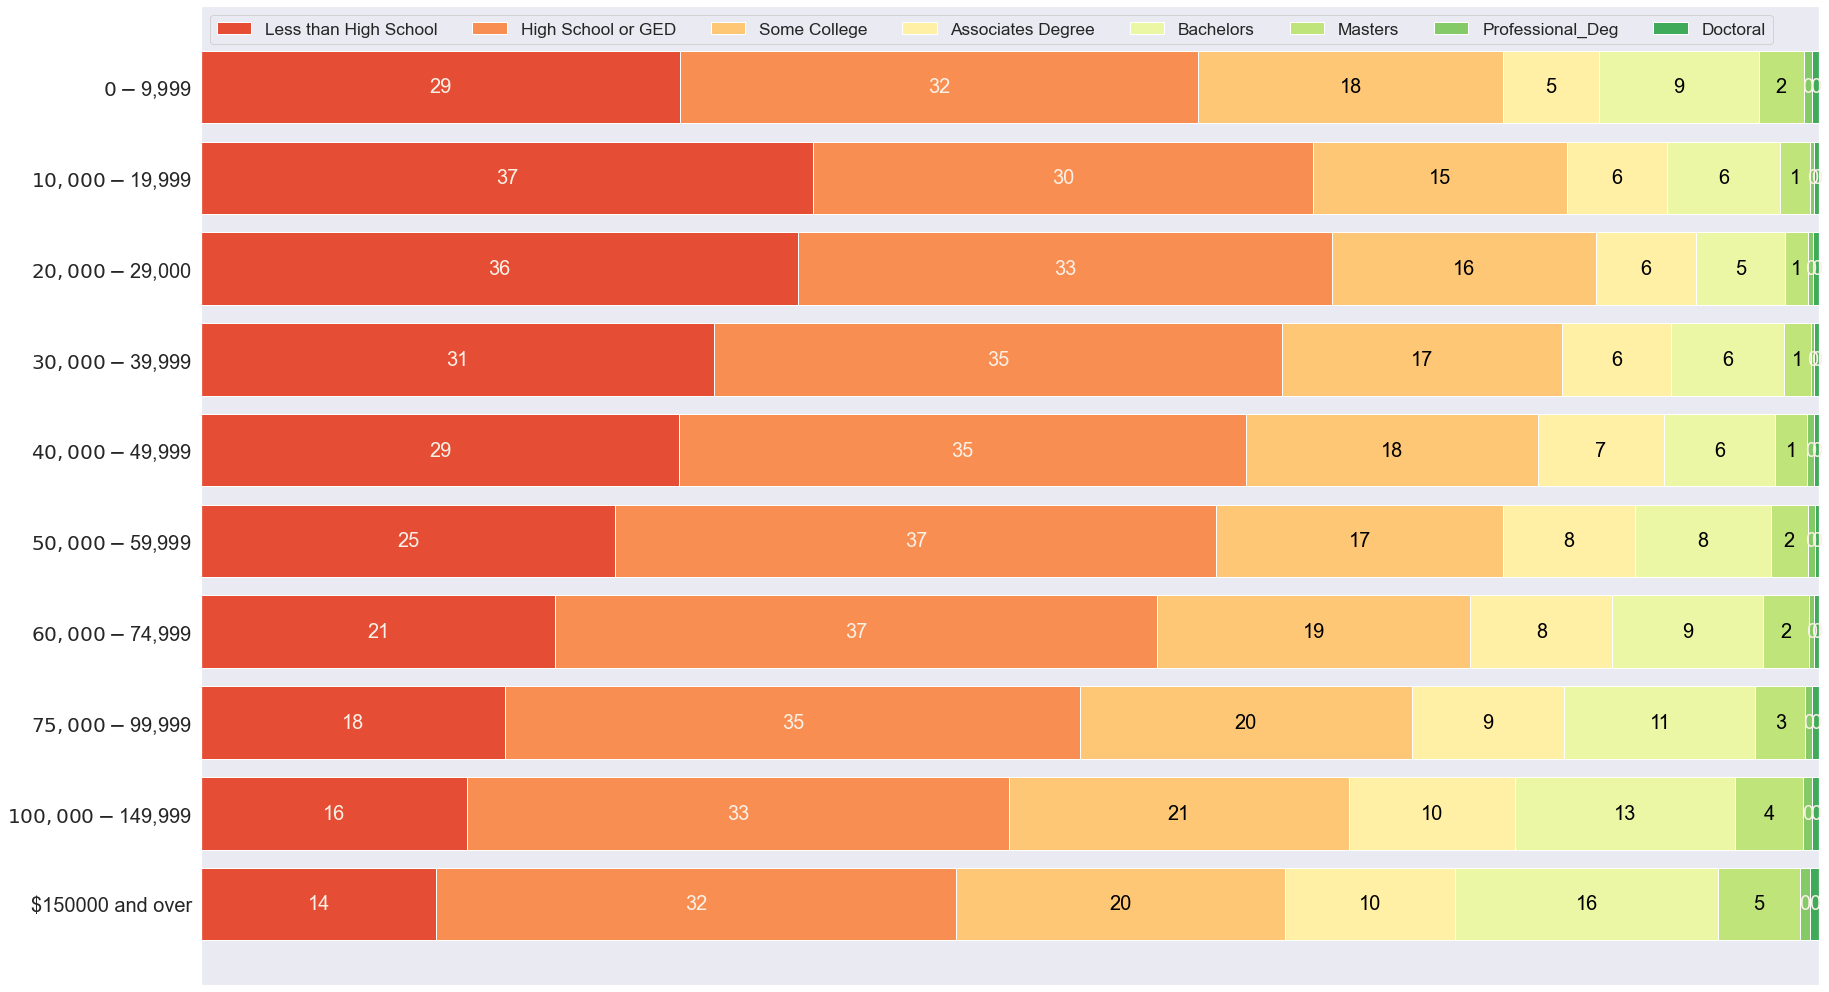

In [39]:
stacked_hor_bar(income_edu_dict_per,edu_name_sort)

# Correlationship Heatmap

In [47]:
salary_education_info.columns

Index(['case_id', 'education', 'age', 'employed', 'gender', 'spouse_empl',
       'num_child', 'full_part_wrk', 'weekly_earn', 'weights', 'year',
       'educaton_text', 'income', 'income_text', 'gender_text', 'spouse_text',
       'full_part_text'],
      dtype='object')

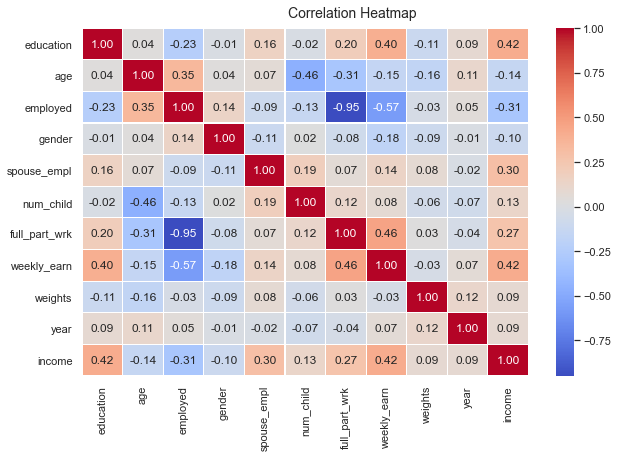

In [49]:
selected_cols = ['education', 'age', 'employed', 'gender', 'spouse_empl',
       'num_child', 'full_part_wrk', 'weekly_earn', 'weights', 'year',
       'educaton_text', 'income', 'income_text', 'gender_text', 'spouse_text',
       'full_part_text']
sampled_data = salary_education_info[selected_cols]
f, ax = plt.subplots(figsize=(10, 6))
corr = sampled_data.corr()
# corr = salary_education_info.corr()
heatmap = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)


# Parallel Coordinates

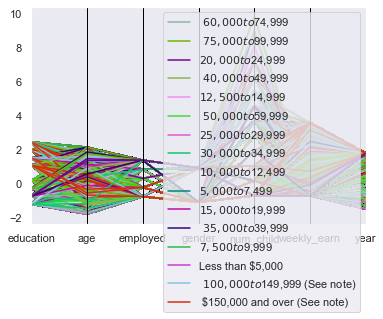

In [75]:
selected_cols = ['education', 'age', 'employed', 'gender',
       'num_child','weekly_earn', 'year']
sampled_data = salary_education_info[selected_cols]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(sampled_data)
scaled_df = pd.DataFrame(scaled_df, columns=selected_cols)
final_df = pd.concat([scaled_df, salary_education_info['income_text']], axis=1)
# final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'income_text')


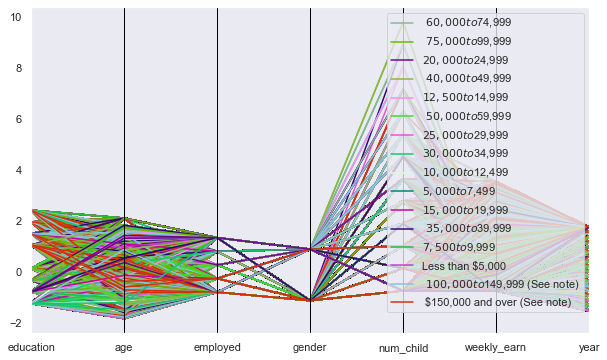

In [77]:
plt.subplots(figsize=(10, 6))
pc = parallel_coordinates(final_df, 'income_text')
plt.show()